#Importing Libraries


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


#Loading The Data

In [2]:
# loading the data
Dataframe = pd.read_csv('winequalityN.csv')


#Printing First 5 Rows

In [3]:
# show rows and columns
Dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Data Information Their Data Types 

In [4]:
# getting info.
Dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#Data Description

In [5]:
Dataframe.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#Checking For Null Values

In [6]:
# null value check
Dataframe.isnull().sum()


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#Plot Histogram For Better Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a49411a90>,
      dtype=object)

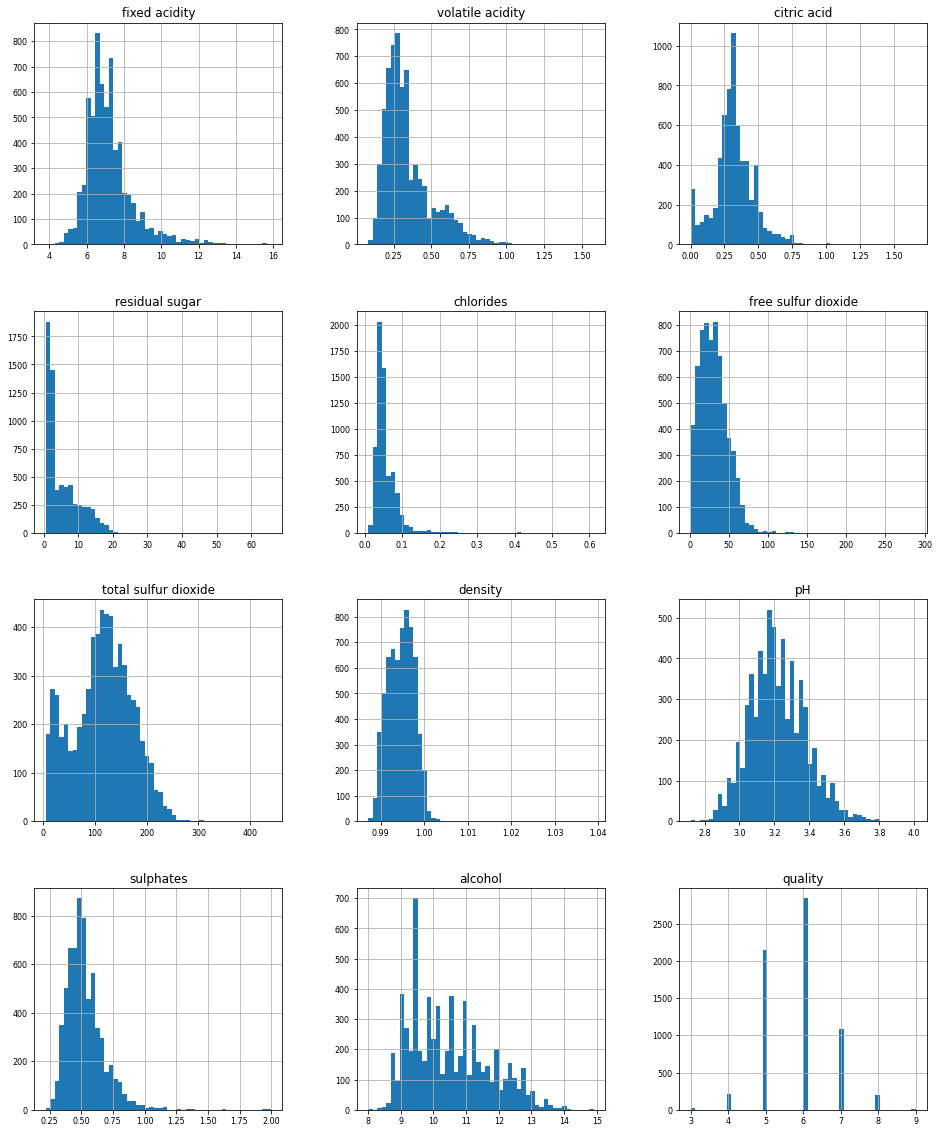

In [7]:
#plot histogram
Dataframe.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)



# Showing Correlation Between Different Attributes

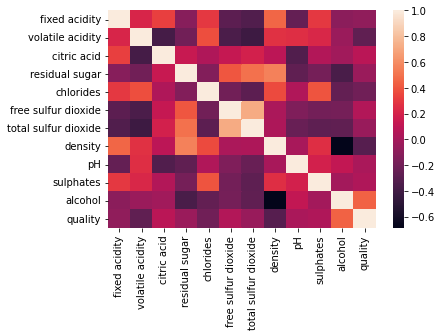

In [8]:
# correlation by visualization
plt.figure()
# plot correlation
sb.heatmap(Dataframe.corr())
plt.show()


# Dependent and Independent features

In [9]:
colm = []
# loop for columns
for i in range(len(Dataframe.corr().keys())):
# loop for rows
  for j in range(i):
    if abs(Dataframe.corr().iloc[i,j]) > 0.7:
      colm = Dataframe.corr().columns[i]


# Dropping Sulfur Dioxide Table

In [10]:
# drop column
new_df = Dataframe.drop('total sulfur dioxide',axis = 1)


#Replace Null Values with Mean 

In [11]:
new_df.update(new_df.fillna(new_df.mean()))


#Handling categorical columns

In [12]:
# no of categorical columns
cat = new_df.select_dtypes(include='O')
# create dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)


      fixed acidity  volatile acidity  ...  quality  type_white
0               7.0             0.270  ...        6           1
1               6.3             0.300  ...        6           1
2               8.1             0.280  ...        6           1
3               7.2             0.230  ...        6           1
4               7.2             0.230  ...        6           1
...             ...               ...  ...      ...         ...
6492            6.2             0.600  ...        5           0
6493            5.9             0.550  ...        6           0
6494            6.3             0.510  ...        6           0
6495            5.9             0.645  ...        5           0
6496            6.0             0.310  ...        6           0

[6497 rows x 12 columns]


#Dependent and Independent features:

In [13]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in Dataframe.quality]
print(df_dummies)


      fixed acidity  volatile acidity  ...  type_white  best quality
0               7.0             0.270  ...           1             0
1               6.3             0.300  ...           1             0
2               8.1             0.280  ...           1             0
3               7.2             0.230  ...           1             0
4               7.2             0.230  ...           1             0
...             ...               ...  ...         ...           ...
6492            6.2             0.600  ...           0             0
6493            5.9             0.550  ...           0             0
6494            6.3             0.510  ...           0             0
6495            5.9             0.645  ...           0             0
6496            6.0             0.310  ...           0             0

[6497 rows x 13 columns]


#Splitting The Dataset

In [14]:
# import libraries
from sklearn.model_selection import train_test_split

# independent variables
x = df_dummies.drop(['quality','best quality'],axis=1)
# dependent variable
y = df_dummies['best quality']

# creating train test splits
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)


# Classification Based on Random Forest Classifier

In [15]:
# code
#import libraries
from sklearn.ensemble import RandomForestClassifier

# for error checking
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report

# create model variable
rnd = RandomForestClassifier()

# fit the model
fit_rnd = rnd.fit(xtrain,ytrain)

# checking the accuracy score
rnd_score = rnd.score(xtest,ytest)

print('score of model is : ',rnd_score*100)




score of model is :  86.76923076923076


# Classifying Whether Wine Is Superior Or Not

In [16]:
y_predict = list(rnd.predict(xtest))
df = {'predicted':y_predict,'original':ytest}
pd.DataFrame(df).head(10)

,predicted,original
369,0,0
6243,0,0
3374,0,0
1009,0,0
220,0,0
4019,0,0
871,0,0
3710,0,0
3781,0,0
1248,0,1


#Classifcation Based On Support Vector Machine 

In [17]:
# for error checking
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xtrain, ytrain)

svc_score = classifier.score(xtest,ytest)

print('score of model is : ',svc_score*100)

score of model is :  79.15384615384615


#  Classifying Whether Wine Is Superior Or Not

In [20]:
y_predict = list(classifier.predict(xtest))
df = {'predicted':y_predict,'original':ytest}
pd.DataFrame(df).head(10)

,predicted,original
369,0,0
6243,0,0
3374,0,0
1009,0,0
220,0,0
...,...,...
1757,0,0
5699,0,0
3875,0,1
5584,0,0


## Pickling 

In [19]:
import pickle
  
def storeData():
      
    # Its important to use binary mode
    sdbfile1 = open('Random_Forest_Classification.pkl', 'ab')
    sdbfile2 = open('Support_Vector_Classifier.pkl', 'ab')
      
    # source, destination
    pickle.dump(rnd, sdbfile1)
    pickle.dump(classifier, sdbfile2)  
    sdbfile1.close()
    sdbfile2.close()
    
  
if __name__ == '__main__':
    storeData()